## Table Of Content

1. [CORMORAN Measurement Campaign](#CORMORAN)
    1. [Motivation for creating a specific tool](#Motivation)
    2. [Prerequisite installations](#pre)
1. [The CorSer Class](#CorSer)
    1. [Load Serie](#Load)
    2. [Get information on the Series](#getinfo)
    3. [Available Data Variable](#Available Data)
        1. [Radio DataFrames](#Radio df)
        1. [Non Radio DataFrames](#Non Radio df)
        3. [Involved Devices](#device)
    4. [Acessing the Data](#access data)
        1. [Get Device Position](#getdevp)
        2. [Get Link Value](#getlink)
        3. [Get Link Distance](#getlinkd)
    5. [Visualizing the data](#vizu)
        1. [Native Pandas Vizualization](#pandas)
        2. [Plot Method](#plot)
        3. [Plot Visibility Method](#plotvisi)
        4. [Plot Mobility Method](#plotmob)
        5. [3D plot](#3Dplot)
        6. [3D plot interactively](#3Dploti)
        7. [3D Interrative  Visibility](#visii)

In [1]:
import  pylayers.util.mayautil as myu
%matplotlib inline

# CORMORAN Measurement Campaign <a id='CORMORAN'></a>

The CORMORAN measurement campaign is the first known campaign in the WBAN context gathering :

+ 3 differents radio technologies (HiKoB, CEA plateform and Beespoon phone)
+ Up to 24 radio devices equiped on a single body
+ A precise capture of the radio device and body movement using a Vicon motion capture (MOCAP) system.
+ A perfect knowledge of the capture environement
+ 58 Series with capture or group navigation scenarios

One of the main characteristics of this measurement campaign is the use of a precise motion capture system which allows to get a ground truth position of any radio device which make the radio observable values open to insightful interpretation.

## Motivation for creating a specific tool <a id='Motivation'></a>

In order to exploit the CORMORAN measurement campaign, a dedicated tool has
been envisaged. Regarding that one aim of the CORMORAN project
(http://pylayers.github.io/pylayers/cormoran.html) is to provide a simulation
plateform from the Channel to the MAC Layer, the tool natturally takes place
inside the PyLayers plateform.

This specific tool creation has been motivated by the intrinsec complexity of the the measurement campaign.
First, no existing tool are able to exploit simultaneously the radio and MOCAP information from the measures.

The co-existence of 3 different radio technologies implies 3 different file formats which have to be interpreted and combined together to be exploitable. However, the motion capture, and the 3 differents radio acces technologies (RAT) operating at different sample rate, which leads to manipulating 4 different time basis. As well, no automatic start-synchronization mechanism was availble between the different technologies which leads to a non systematic time shift between the different basis.

Finally the aim of a measurement campaign is to easily provide valuable and exploitable information for the project members and more generally by people in the research community. The goal of such a tool is to help and simplify dissemination.

## Prerequisite Installations <a id='pre'></a>



Before starting using this tool, some requirements have to be satisfied.

1. The open source platform PyLayers ( http://www.pylayers.org ) has to be installed following the installation notes here: https://github.com/pylayers/pylayers/blob/master/INSTALL.txt

2. The CORMORAN measurements have to be downloaded from the gitlab repository (URL PROVIDED SHORTLY)
3. An environement variable $CORMORAN has to be set at the root of your CORMORAN measurements directory (help about setup of environement variables can be found in pylayers' INSTALL.txt

Once those 3 steps are satisfied, the CORMORAN exploitation measure tool is ready to be used.

# The `CorSer` Class <a id='CorSer'></a>

The exploitation of measures tool takes place as a specific class named CorSer (which stands for Cormoran Series).
Once PyLayers has been installed, it is possible to directly access to the class by importing it.

In [3]:
from pylayers.measures.cormoran import *

### <a id='getinfo'></a> Get information on the Series


Before creating the CorSer object it is possible to consult the available measurements series using *cor_log()*. Then for each **serie** of a given **day** it is possible to get:

+ The involved subject(s)
+ The radio technology
+ A short description of the serie

In [4]:
cor_log()

,serie,day,Subject,techno,Short Notes
0,1,11,Bernard,TCR,Subject Walk circularly
1,2,11,Bernard,TCR,Subject Walk circularly
2,3,11,Bernard,TCR,Subject Walk circularly
3,4,11,Bernard,TCR,Subject Walk circularly
4,5,11,Nicolas,HKB+BS,Subject Walk circularly
5,6,11,Nicolas,HKB+BS,Subject Walk circularly
6,7,11,Nicolas,HKB+BS,Subject Walk circularly
7,8,11,Nicolas,HKB+BS,Subject Walk circularly
8,9,11,Bernard,TCR,INTERRUPTED Subject Walk circularly ++ speed
9,10,11,Bernard,TCR,Subject Walk circularly ++ speed


## <a id='Load'></a> Load Serie

As an example, serie 6 from day 11 can be loaded using the following command:

In [5]:
S=CorSer(serie=6,day=11)


load infrastructure node position: **** Processor coding : Intel-PC

load  Nicolas  body: **** Processor coding : Intel-PC

BS data frame index:  Align on mocap OK... time-offset applied OK

HKB data frame index: Align on mocap OK... time-offset applied OK

Create distance Dataframe... OK


Once loaded information about the serie (date, type, ...) can be obtained just by calling the object itself:

In [7]:
S.B

{'Nicolas': My name is : Nicolas
 
 I have a hikob device with id #HKB:16 on RAnkleNode	-> Antenna 3GPP_AnkleRight_7
 I have a hikob device with id #HKB:14 on LKneeNode	-> Antenna 3GPP_KneeLeft_7
 I have a hikob device with id #HKB:15 on LAnkleNode	-> Antenna 3GPP_AnkleLeft_7
 I have a hikob device with id #HKB:12 on RWristNode	-> Antenna 3GPP_WristRight_7
 I have a hikob device with id #HKB:13 on LWristNode	-> Antenna 3GPP_WristLeft_7
 I have a hikob device with id #HKB:10 on LElbowNode	-> Antenna 3GPP_ElbowLeft_7
 I have a hikob device with id #HKB:11 on RHipNode	-> Antenna 3GPP_HipRight_7
 I have a bespoon device with id #BS:157 on RWristNode	-> Antenna S1R1
 I have a hikob device with id #HKB:5 on RHeadNode	-> Antenna 3GPP_HeadRight_7
 I have a hikob device with id #HKB:6 on RFChestNode	-> Antenna 3GPP_TorsoTopRight_7
 I have a hikob device with id #HKB:7 on LFChestNode	-> Antenna 3GPP_TorsoTopLeft_7
 I have a bespoon device with id #BS:74 on RAnkleNode	-> Antenna S1R1
 I have a be

In [6]:
S.B['Nicolas'].time

array([  0.00000000e+00,   1.00000000e-02,   2.00000000e-02, ...,
         1.04170000e+02,   1.04180000e+02,   1.04190000e+02])

In [8]:
S.hkb.index

Float64Index([   0.0,   0.01,   0.02,   0.03,   0.04,   0.05,   0.06,   0.07,
                0.08,   0.09, 
              ...
              101.66, 101.67, 101.68, 101.69,  101.7, 101.71, 101.72, 101.73,
              101.74, 101.75],
             dtype='float64', length=10176)

In [9]:
S

filename : Sc20_S6_R2_HKBS
filewear : /data/CORMORAN/cormoran-measures/POST-TREATED/11-06-2014/BodyandWear/Nicolas_11-06-2014_HKBS.ini
filebody : /data/CORMORAN/cormoran-measures/POST-TREATED/11-06-2014/BodyandWear/Nicolas.ini
filemocap : /data/CORMORAN/cormoran-measures/RAW/11-06-2014/MOCAP/serie_006.c3d
Day : 11/06/2014
Serie : 6
Scenario : 20
Run : 2
Type : HKBS
Original Video Id : Single
Subject(s) : Nicolas 

Body available: True

BeSPoon : Sc20_S6_R2_HKBS.csv
HIKOB : Sc2_0_S6_r2_HKB_Single.mat
----------------------

VC file :[6]
Scenario :['2.0']
Meas Serie :[6]
Meas Run :[2]
Subject :['Nicolas']
techno :['HKB+BS']
video file :[ nan]
photo file :['100-0040']
Radio file :['SC2.0_S6_R2_HKB_single']
Date :['11/06/14']
Start time :['16:12']
Short Notes :['Subject Walk circularly']
notes pendant mesures :['m\xc3\xaame chose ras ']

## <a id='Available Data'></a> Available data

### <a id='Radio df'></a> Radio DataFrames



Data frames are *Pandas* objects which can be interpreted as tables.

+ Each line correspond a given timestamp
+ Each column correspond to a given link between 2 radio devices

Depending on available RAT involved in the serie, different data frames are available:

+ HiKoB (HKB) data : *S.hkb*
+ BeSpoon data : *S.bespo*
+ TCR data : *S.tcr*

In the example serie chosen, only HiKoB and Bespoon are available.

Here is an example of the RSS values obtained by the HKB sensors for the 120 available links and the 5 first available timestamp :

In [10]:
S.hkb.head(5)

,AP1-AP2,AP1-AP3,AP1-AP4,AP1-HeadRight,AP1-TorsoTopRight,AP1-TorsoTopLeft,AP1-BackCenter,AP1-ElbowRight,AP1-ElbowLeft,AP1-HipRight,...,WristRight-WristLeft,WristRight-KneeLeft,WristRight-AnkleLeft,WristRight-AnkleRight,WristLeft-KneeLeft,WristLeft-AnkleLeft,WristLeft-AnkleRight,KneeLeft-AnkleLeft,KneeLeft-AnkleRight,AnkleLeft-AnkleRight
0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.02,-60,-64,-61,-71,-81,-73,-78,-79,-84,-73,...,-64,-88,-64,-55,-63,-61,-77,-60,-84,-79
0.03,-60,-64,-61,-71,-81,-73,-78,-79,-84,-73,...,-64,-88,-64,-55,-63,-61,-77,-60,-84,-79
0.04,-60,-64,-61,-71,-81,-73,-78,-79,-84,-73,...,-64,-88,-64,-55,-63,-61,-77,-60,-84,-79


### <a id='Non Radio df'></a> Non Radio DataFrames



Extra data frames are also available to acces to non radio information. In particular, it exists :

+ *S.devdf*: the device dataframe, which gives mechanical information: position (x,y,z), velocity (v,vx,vy,vz) and acceleration (a,ax,ay,az) of the devices at any time stamps
+ *S.distdf*: the distance data frame, which gives ground truth distances between the different radio links.

Here is the 5 last data of the device data frame...

In [9]:
S.devdf.tail(5)

,id,subject,x,y,z,v,vx,vy,vz,a,ax,ay,az
104.19,HKB:14,Nicolas,0.158588,-1.574102,0.526740,0.012376,-0.005046,0.010522,0.004120,2.242279,1.973267,0.738525,0.767212
104.19,HKB:1,,0.018552,-2.749937,0.979166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
104.19,HKB:16,Nicolas,-0.229677,-1.445404,0.175125,0.010564,-0.007414,-0.006641,-0.003540,0.547866,0.122223,-0.250244,-0.471802
104.19,HKB:10,Nicolas,0.262695,-1.433168,1.143153,0.057834,-0.048334,-0.030042,-0.010303,0.924481,-0.697327,0.368652,-0.482178
104.19,HKB:3,,0.021135,3.375590,1.003871,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


... and the 5 last data of the distance data frame:

In [10]:
S.devdf.columns

Index([u'id', u'subject', u'x', u'y', u'z', u'v', u'vx', u'vy', u'vz', u'a',
       u'ax', u'ay', u'az'],
      dtype='object')

In [11]:
S.distdf.columns

Index([u'HKB:1-HKB:2', u'HKB:1-HKB:3', u'HKB:1-HKB:4', u'HKB:1-HKB:5',
       u'HKB:1-HKB:6', u'HKB:1-HKB:7', u'HKB:1-HKB:8', u'HKB:1-HKB:9',
       u'HKB:1-HKB:10', u'HKB:1-HKB:11', 
       ...
       u'HKB:12-HKB:15', u'HKB:12-HKB:16', u'HKB:13-HKB:14', u'HKB:13-HKB:15',
       u'HKB:13-HKB:16', u'HKB:14-HKB:15', u'HKB:14-HKB:16', u'HKB:15-HKB:16',
       u'BS:0-BS:74', u'BS:0-BS:157'],
      dtype='object', length=122)

In [12]:
S.distdf.tail(5)

,HKB:1-HKB:2,HKB:1-HKB:3,HKB:1-HKB:4,HKB:1-HKB:5,HKB:1-HKB:6,HKB:1-HKB:7,HKB:1-HKB:8,HKB:1-HKB:9,HKB:1-HKB:10,HKB:1-HKB:11,...,HKB:12-HKB:15,HKB:12-HKB:16,HKB:13-HKB:14,HKB:13-HKB:15,HKB:13-HKB:16,HKB:14-HKB:15,HKB:14-HKB:16,HKB:15-HKB:16,BS:0-BS:74,BS:0-BS:157
104.15,6.102589,6.125578,6.135849,1.308815,1.163639,1.131707,1.387571,1.322510,1.350930,1.223406,...,1.071233,0.990922,0.411064,0.753501,0.910143,0.364396,0.539795,0.445009,1.046829,0.119864
104.16,6.102589,6.125578,6.135849,1.309074,1.163713,1.131587,1.387549,1.322884,1.350486,1.223658,...,1.071489,0.990873,0.410944,0.753502,0.909901,0.364396,0.539682,0.445027,1.046903,0.119868
104.17,6.102589,6.125578,6.135849,1.309470,1.163938,1.131414,1.387530,1.323230,1.350018,1.223874,...,1.071624,0.990832,0.410933,0.753522,0.909759,0.364316,0.539533,0.445038,1.046936,0.119734
104.18,6.102589,6.125578,6.135849,1.309873,1.164064,1.131319,1.387509,1.323601,1.349608,1.224129,...,1.071955,0.990734,0.410871,0.753529,0.909520,0.364281,0.539368,0.445063,1.047000,0.119982
104.19,6.102589,6.125578,6.135849,1.310357,1.164289,1.131228,1.387509,1.323915,1.349214,1.224341,...,1.072294,0.990736,0.410651,0.753482,0.909291,0.364271,0.539394,0.445110,1.046967,0.119830


### <a id='device'></a> Involved devices (*S.dev*)



The *S.dev* command allows to obtain the complete list of devices involved in the serie and:

+ the Name of the device used in the radio dataframe
+ the Real device Id used during the measurement campaign
+ The corresponding device Id used on the Body wear description
+ At wich Subject the device is related.

Infrastrucure access point obviously don't have related Subject.

In [13]:
S.B['Nicolas'].dev.keys()

['HKB:16',
 'HKB:14',
 'HKB:15',
 'HKB:12',
 'HKB:13',
 'HKB:10',
 'HKB:11',
 'BS:157',
 'HKB:5',
 'HKB:6',
 'HKB:7',
 'BS:74',
 'BS:0',
 'HKB:8',
 'HKB:9']

In [14]:
S.dist_nodesmap

['HKB:1',
 'HKB:2',
 'HKB:3',
 'HKB:4',
 'HKB:16',
 'HKB:14',
 'HKB:15',
 'HKB:12',
 'HKB:13',
 'HKB:10',
 'HKB:11',
 'BS:157',
 'HKB:5',
 'HKB:6',
 'HKB:7',
 'BS:74',
 'BS:0',
 'HKB:8',
 'HKB:9']

In [15]:
S.devmapper('BS:157')

('WristRight', 157, 'BS:157', 'Nicolas', 'BS')

In [16]:
S.dist.shape

(10420, 19, 19)

In [17]:
S.dev

Name in Dataframe     | Real Id | Body Id  | Subject    
AP4                   |       4 | HKB:4    |            
AP1                   |       1 | HKB:1    |            
AP2                   |       2 | HKB:2    |            
AP3                   |       3 | HKB:3    |            
--------------------------------------------------------          
AnkleRight            |      16 | HKB:16   | Nicolas    
KneeLeft              |      14 | HKB:14   | Nicolas    
AnkleLeft             |      15 | HKB:15   | Nicolas    
WristRight            |      12 | HKB:12   | Nicolas    
WristLeft             |      13 | HKB:13   | Nicolas    
ElbowLeft             |      10 | HKB:10   | Nicolas    
HipRight              |      11 | HKB:11   | Nicolas    
HeadRight             |       5 | HKB:5    | Nicolas    
TorsoTopRight         |       6 | HKB:6    | Nicolas    
TorsoTopLeft          |       7 | HKB:7    | Nicolas    
BackCenter            |       8 | HKB:8    | Nicolas    
ElbowRight           

## <a id='access data'></a> Accessing the data



In order to help people not familiar with the Pandas query format, some useful methods are provided in order to extract values from radio and non radio dataframes.

<a id='getdevp'></a>
### Get device position (*S.getdevp*)

The value of the device position at a specific time or range or time can be obtained by specifying:

+ The device (Name in dataframe OR real id OR body id)
+ The radio *techno* (Precising the techno is optional except when an ambiguity occurs, therefore error is raised)
+ a given time in second or a [start time,stop time]. If no time is given, the position for all time stamps are provided

Hence, It is possible to get the positions of the HKB radio node 11 (Hip Right), between 5.0 seconds and 5.2 seconds with:

In [18]:
Positions = S.getdevp(11,t=[5,5.2])
Positions

,x,y,z
5.00,-0.139566,0.224905,1.016796
5.01,-0.139553,0.224845,1.016826
5.02,-0.139545,0.224825,1.016818
5.03,-0.139564,0.224730,1.016849
5.04,-0.139609,0.224642,1.016859
5.05,-0.139580,0.224613,1.016898
5.06,-0.139554,0.224586,1.016920
5.07,-0.139604,0.224492,1.016937
5.08,-0.139545,0.224452,1.016989
5.09,-0.139521,0.224391,1.016992


**NOTE : You may also obtain a classical numpy array instead of this Pandas object by using the "*values*" method :**

In [19]:
Positions.values

array([[-0.13956557,  0.22490462,  1.01679608],
       [-0.13955284,  0.22484492,  1.01682581],
       [-0.13954524,  0.22482529,  1.01681787],
       [-0.1395645 ,  0.2247298 ,  1.01684918],
       [-0.13960907,  0.224642  ,  1.01685901],
       [-0.13957962,  0.2246127 ,  1.01689801],
       [-0.13955351,  0.22458575,  1.01691986],
       [-0.13960399,  0.22449205,  1.01693719],
       [-0.13954485,  0.22445244,  1.01698865],
       [-0.13952087,  0.22439058,  1.0169917 ],
       [-0.13938625,  0.22439655,  1.0169975 ],
       [-0.13929645,  0.22431535,  1.01704102],
       [-0.13916449,  0.22418907,  1.0170979 ],
       [-0.1389884 ,  0.22412761,  1.01713135],
       [-0.13880983,  0.22404759,  1.0171424 ],
       [-0.13860497,  0.22396939,  1.01714777],
       [-0.1384055 ,  0.22387668,  1.01716443],
       [-0.13804305,  0.22380293,  1.01722955],
       [-0.13779123,  0.2236543 ,  1.01730511],
       [-0.13738791,  0.22358025,  1.01732141],
       [-0.13701614,  0.22346536,  1.017

### <a id='getlink'></a>  Get link value (*S.getlink*)


The value of a link *a* and *b* at a specific time or range or time can be obtained by specifying:

+ The device $a$ (Name in dataframe OR real id OR body id)
+ The device $b$ (Name in dataframe OR real id OR body id)
+ The radio *technoa* and *technob* (Precising the techno is optional except when an ambiguity occurs, therefore error is raised)
+ a given time in second or a [start time,stop time]. If no time is given, the position for all time stamps are provided

Hence, It is possible to get the HKB values between radio node 11 (Hip Right) and node 16 (Ankle Right) , between 5 seconds and 5.2 seconds with:

In [20]:
Values = S.getlink(11,16,t=[5,5.2])
Values

5.00   -67
5.01   -67
5.02   -67
5.03   -67
5.04   -67
5.05   -67
5.06   -67
5.07   -67
5.08   -67
5.09   -67
5.10   -67
5.11   -67
5.12   -67
5.13   -67
5.14   -67
5.15   -67
5.16   -67
5.17   -67
5.18   -67
5.19   -66
5.20   -66
Name: HipRight-AnkleRight, dtype: float64

### <a id='getlinkd'></a> Get link distance (*S.getlinkd*)

The ground truth distance separating a device *a* and device *b* at a specific time or range or time can be obtained by specifying:

+ The device $a$ (Name in dataframe OR real id OR body id)
+ The device $b$ (Name in dataframe OR real id OR body id)
+ The radio *technoa* and *technob* (Precising the techno is optional except when an ambiguity occurs, therefore error is raised)
+ a given time in second or a [start time,stop time]. If no time is given, the position for all time stamps are provided

Hence, It is possible to get the HKB values between radio node 11 (Hip Right) and node 16 (Ankle Right) , between 5 seconds and 5.2 seconds with:

In [21]:
Distances = S.getlinkd(11,16,t=[5,105.2])


## <a id='vizu'></a> Visualizing the Data

###  <a id='pandas'></a> Native Pandas Vizualization

Because radio data in CorSer are stored into Pandas objects, convenient vizualization method are directly available. Most of them can be found here : http://pandas.pydata.org/pandas-docs/stable/visualization.html

As an example, it is possbile tthe previous obtained values and distance with :

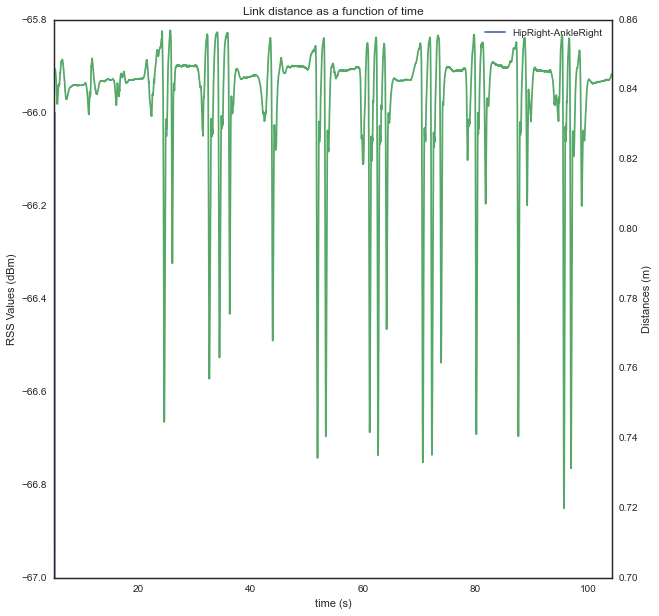

In [22]:
# Ploting
ax=Values.plot() #plot values
l=Distances.plot(secondary_y=True,ax=ax,figsize=(10,10)) # plot distances on the right side

##Labelling
ax.legend() # add legend box
ax.set_ylabel('RSS Values (dBm)') #set left ylabel
ax.right_ax.set_ylabel('Distances (m)') #set right ylabel
ax.set_xlabel('time (s)') # set xlabel
ax.set_title('Link distance as a function of time')

In addition, CorSer also provides specific plotting methods which includes extra features.

### <a id='plot'></a> Plot method (S.plot)



The plot function allows to display the radio values of a link.
The main parameters are always the same:

+ The device $a$ (Name in dataframe OR real id OR body id)
+ The device $b$ (Name in dataframe OR real id OR body id)
+ The radio *techno* (Precising the techno is optional except when an ambiguity occurs, therefore error is raised)
+ A given time in second or a [start time,stop time]. If no time is given, the position for all time stamps are provided

More option are availble, please refer to the docstring (*S.plot?*) for more information

####Plot values
Continuying with the same example, it is possible to plot the HKB values between radio node 11 (Hip Right) and node 16 (Ankle Right) , between 5 seconds and 5.2 seconds with:

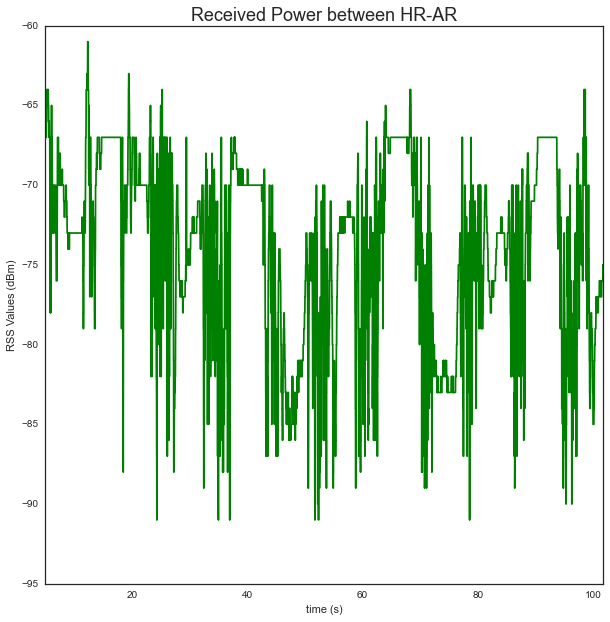

In [23]:
S.plot(11,16,t=[5,105.2],figsize=(10,10))
plt.ylabel('RSS Values (dBm)') #set left ylabel
plt.xlabel('time (s)') # set xlabel

### Plot distance



As well, it is possible to plot the distance using the *distance* parameter

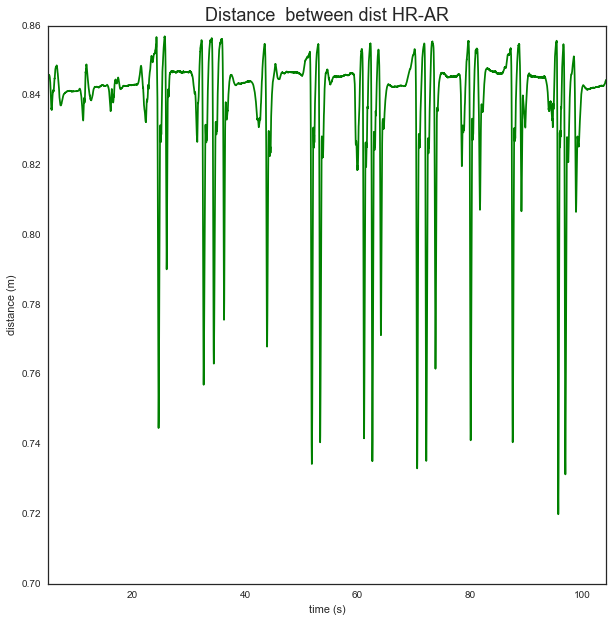

In [24]:
S.plot(11,16,t=[5,105.2],distance=True,figsize=(10,10))
plt.xlabel('time (s)') # set xlabel

It is also possible to get the same result than with the Pandas procedure with the following code :

(<matplotlib.figure.Figure at 0x7f21070a6050>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f210b58e5d0>)

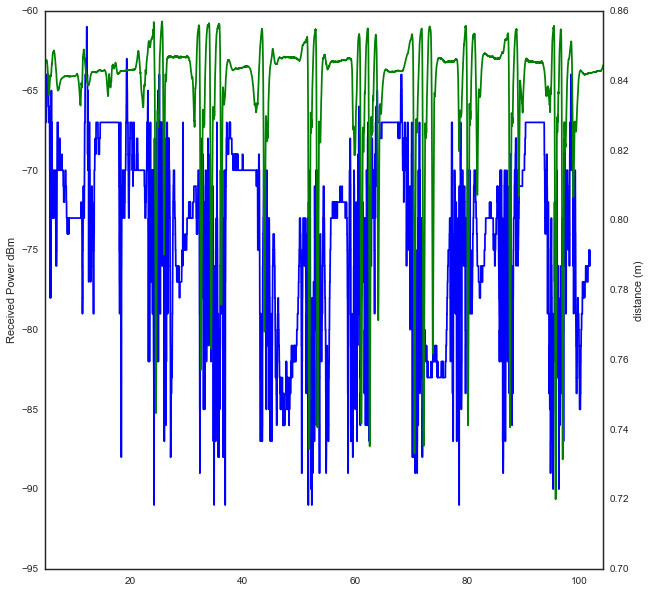

In [25]:
#plot value
f,ax = S.plot(11,16,t=[5,105.2],color ='b',title=False,figsize=(10,10))

# create right axis
ax2=ax.twinx()

# plot distance
S.plot(11,16,t=[5,1055.2],color ='g',title=False,
       distance=True,
       fig=f,ax=ax2)

### <a id='plotvisi'></a> Plot visibility method (S.pltvisi)



In order to go further in the radio value interpretation, it is convenient to have some extra information about the **optical visibility/occultation** of devices involved in a link.

This information allows to determine the line of sight (LOS) or non line of sight (NLOS) cases which are crutial for power level and delay interpretation.

This information can be superimposed to the radio values. To this end, the plot visibility (*S.pltvisi*) method is used.
The **hatched** area denoted **NLOS** wheras **clear** area denotes **LOS**.

Parameters are the same than those the *plot* method:

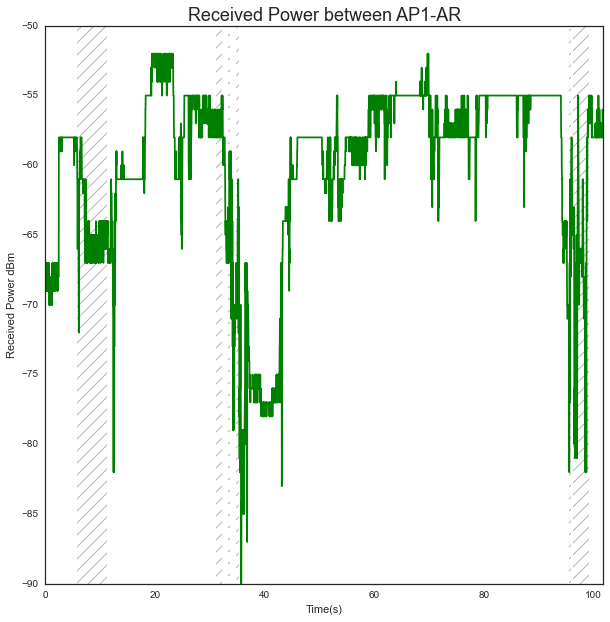

In [26]:
f,ax = S.plot(1,16,figsize=(10,10))
S.pltvisi(1,16,fig=f,ax=ax,)
plt.xlabel('Time(s)')

### <a id='plotmob'></a> Plot mobility method (S.pltmob)



As well it is possible to determine and indicate whether the subject is static or not by using the plot mobility method (*S.pltmob*).
The succession of Static and Mobile sequences are denoted $S_x$ and $M_x$ resplectively, where $x$ is an index of the sequence.

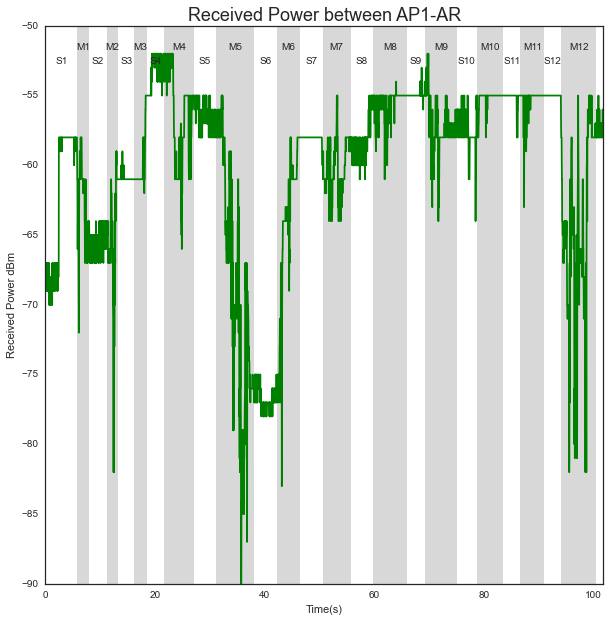

In [27]:
f,ax = S.plot(1,16,figsize=(10,10))
S.pltmob(fig=f,ax=ax)
plt.xlabel('Time(s)')

The 2 upmentionned methods can also be used simultaneously as shown in the following example :

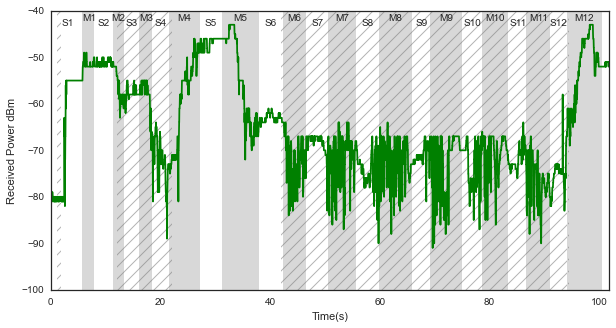

In [28]:
# plot data in green)
f,ax=S.plthkb(1,13,figsize=(10,5))
# plot optical occultation (hatched lines)
S.pltvisi(1,13,fig=f,ax=ax)
# plot subject mobility (grey areas)
S.pltmob(showvel=False,ylim=([-100,-40]),fig=f,ax=ax)
plt.xlabel('Time(s)')

### <a id='3Dplot'></a> 3D plot (S._show3)



With the help of the Mayavi Library, the CorSer class allows to display in 3D :

+ The building where measurements have taken place
+ The positions of Vicon Cameras
+ The Multi-cylindric representation of the the subjects involved in the selected serie
+ The position/ antenna pattern of the devices on the body(ies) and in the infrastructure.


By default, the use of the *S._show3* method display the complete scene with body(ies) and associated devices at 4 different timestamp

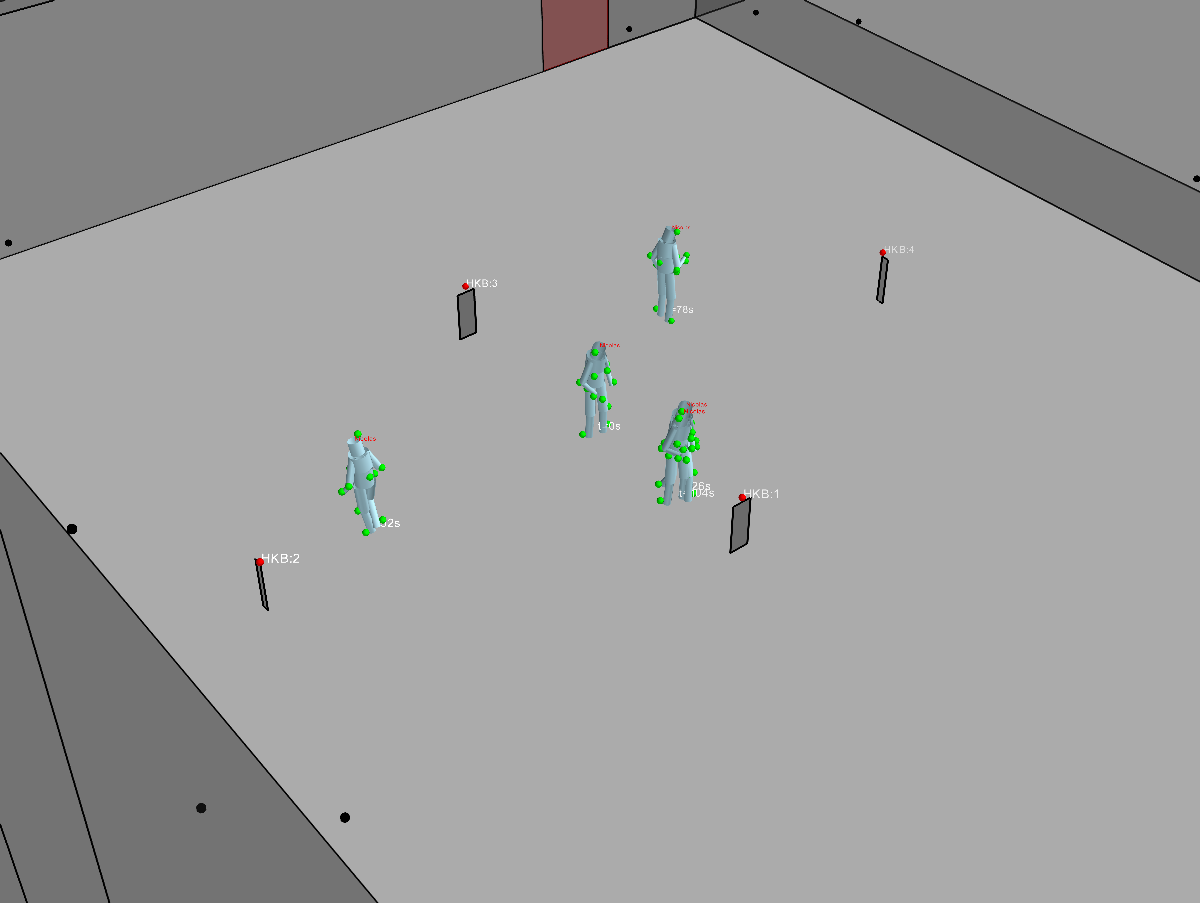

In [29]:
S._show3()

#the following line is only used to display in the notebook a screenshot of the mayavi window
myu.inotshow('fig1')

#### Specify time (*bodytime* parameter)



In order to display scene at specific timestamps, the parameter *bodytime* can be used

Example: to show the body position at $t=0s$, $t=30s$ and $t=90s$.

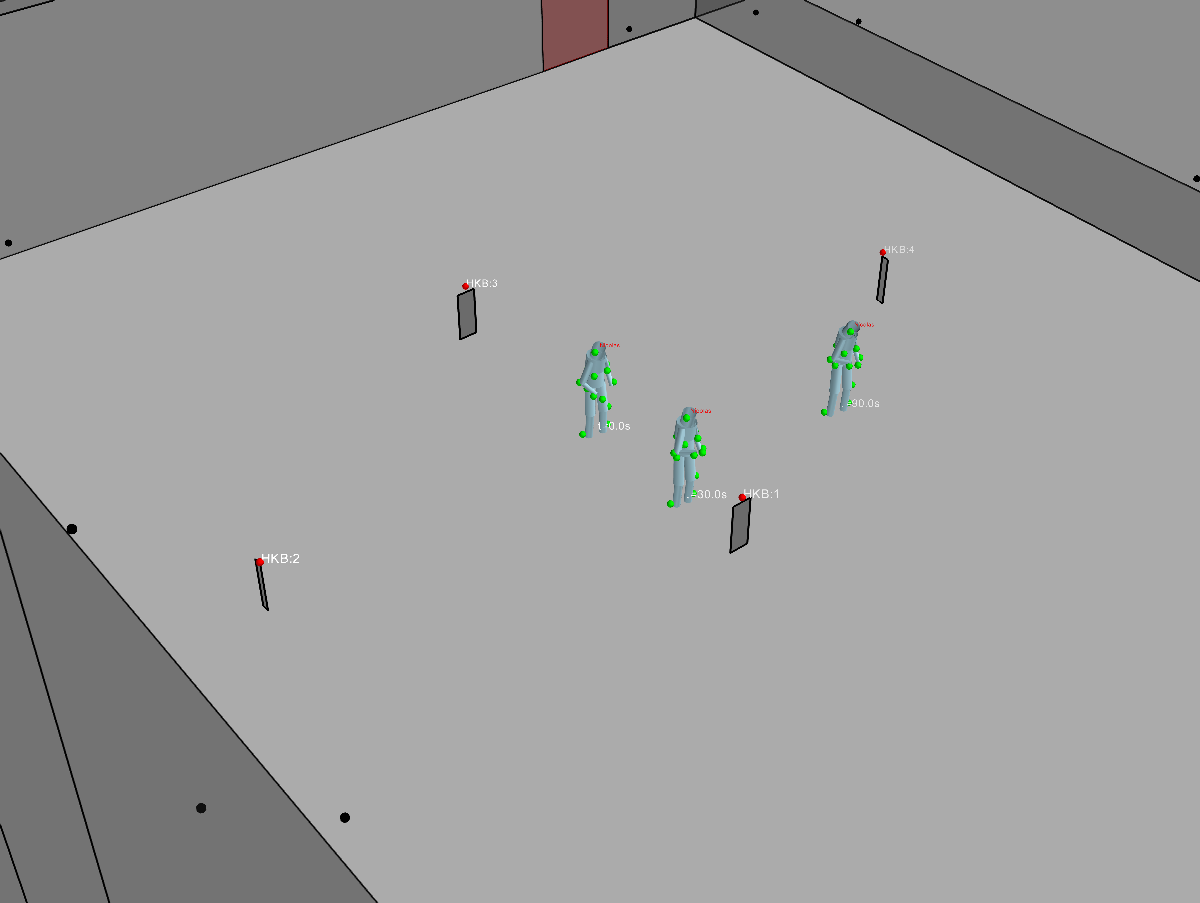

In [30]:
S._show3(bodytime=[0.,30.,90.])

#the following line is only used to display in the notebook a screenshot of the mayavi window
myu.inotshow('fig2')

#### display trajectory (*trajectory* parameter)

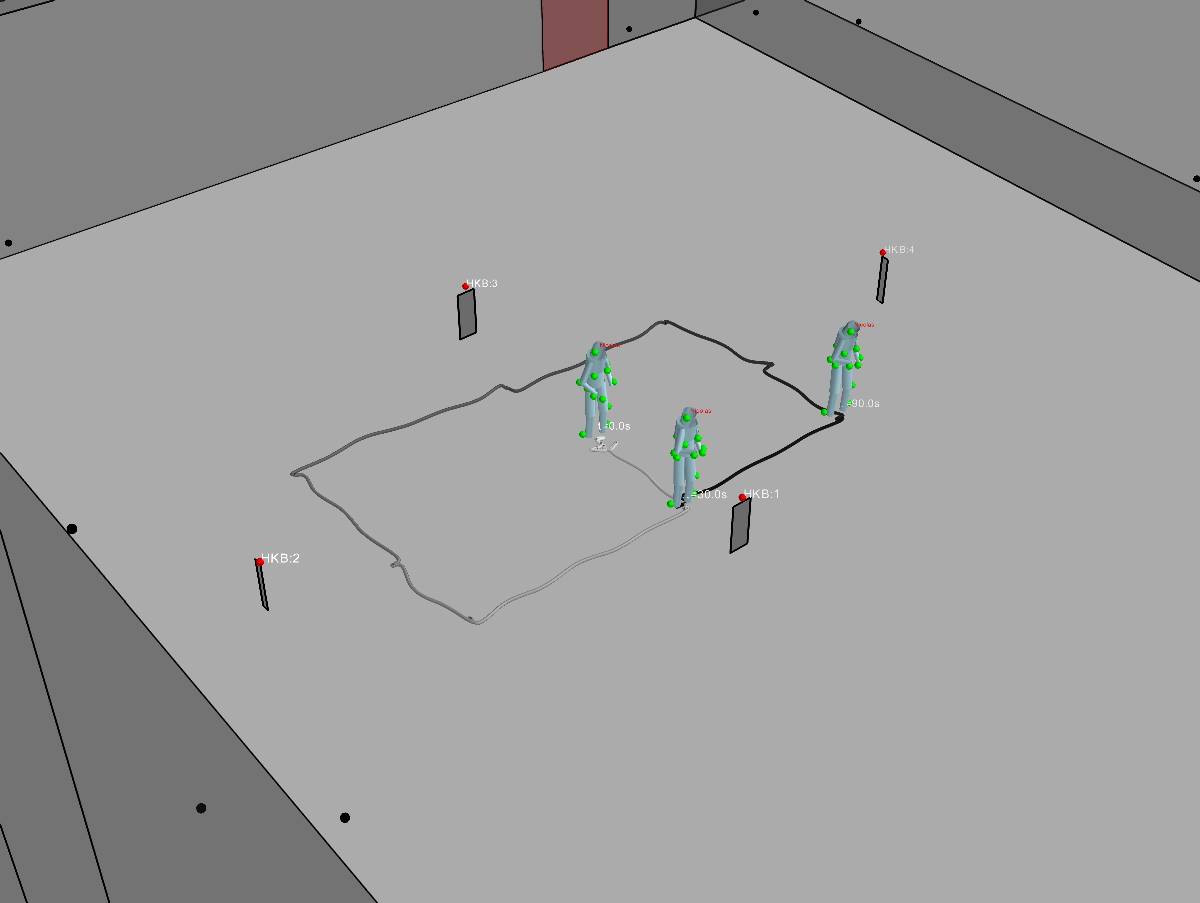

In [31]:
S._show3(trajectory = True,bodytime=[0.,30.,90.])

#the following line is only used to display in the notebook a screenshot of the mayavi window
myu.inotshow('fig3')

### <a id='3Dploti'></a> 3D plot interactive (*S._show3i*)


The method *S._show3i()* allows to display the 3D scene with an extra window incluying a slider acting like a jog shuttle, to choose the timestamp to vizualize.

Note : This function is note available in the notebook

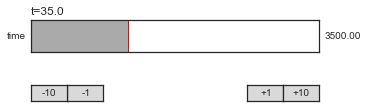

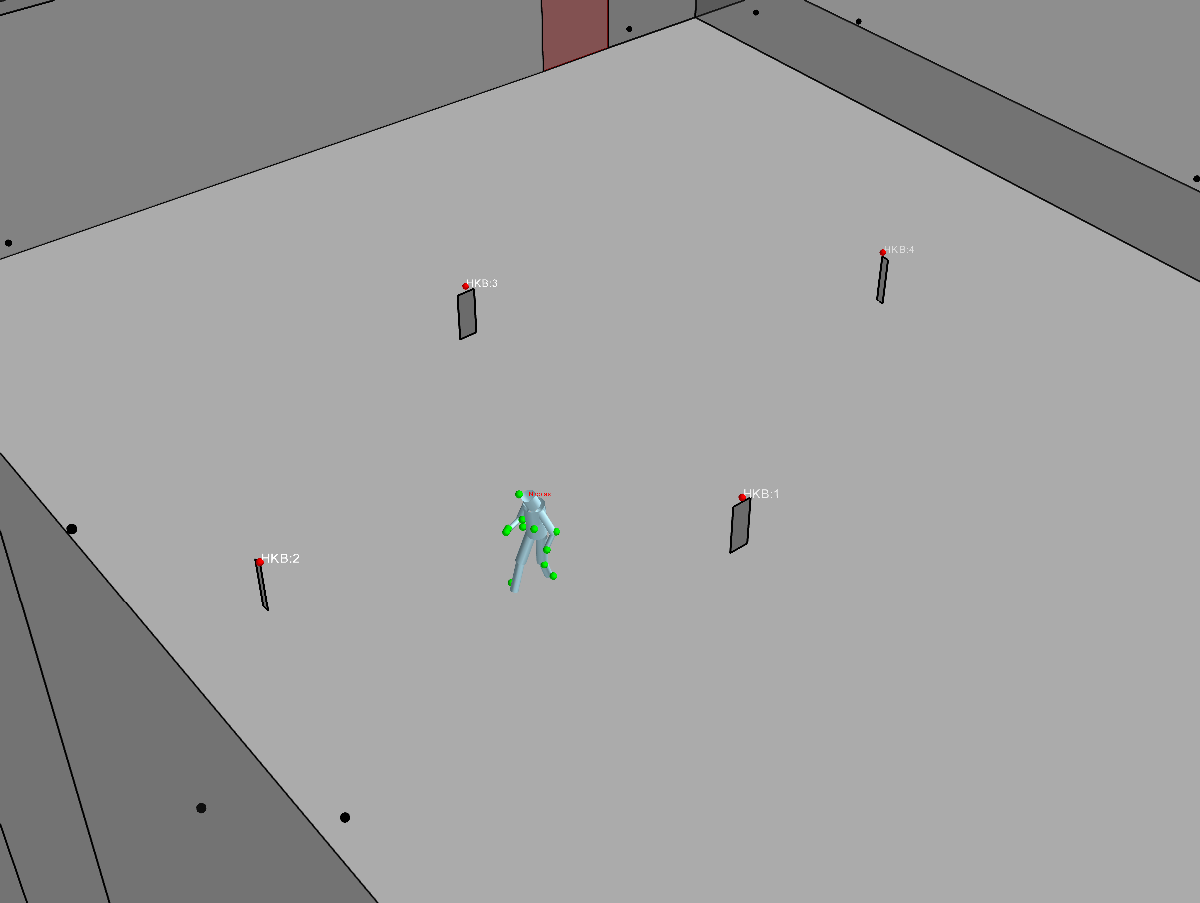

In [32]:
S._show3i(t=35) #t=35 is an initialization value

#the following line is only used to display in the notebook a screenshot of the mayavi window
myu.inotshow('fig4')

### <a id='visii'></a> Interactive visibility (*S.imshowvisibility_i*)



The visibility matrix can be displayed simultaneously to the 3D view.

For that purpose a visibility/occultation matrix is computed the first time the vizualization is called.
The following code displays the tisibility matrix and associated 3D scene at the inital time $t=35s$

Visibility is computed only once, Please wait

processing shadowing from  Nicolas


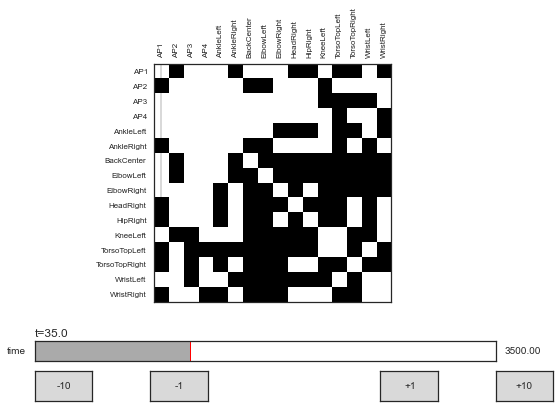

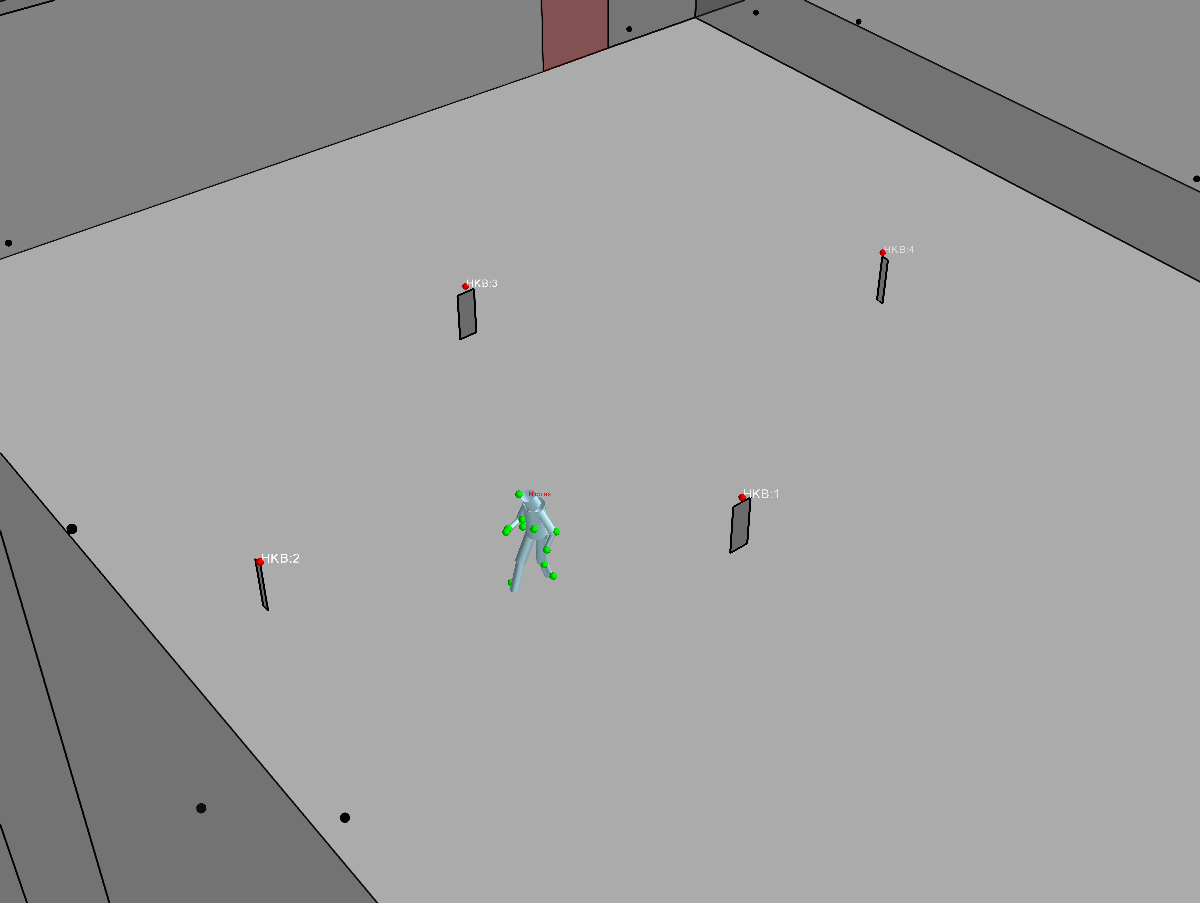

In [33]:
S.imshowvisibility_i(t=35)

#the following line is only used to display in the notebook a screenshot of the mayavi window
myu.inotshow('fig5')

## Using Pylayers Ray-tracing with CorSer data


Coming soon, work in progress

In [34]:
import pylayers.simul.simultraj as st

In [35]:
links = list(S.hkb.columns)
links = map(lambda x: x.split('-'),links)


# Synchronization 

In [36]:
S.tmocap

array([  0.00000000e+00,   1.00000000e-02,   2.00000000e-02, ...,
         1.04170000e+02,   1.04180000e+02,   1.04190000e+02])

In [37]:
%matplotlib inline

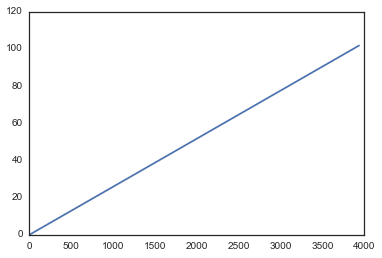

In [38]:
plt.plot(S.thkb)

In [39]:
S.hkb

,AP1-AP2,AP1-AP3,AP1-AP4,AP1-HeadRight,AP1-TorsoTopRight,AP1-TorsoTopLeft,AP1-BackCenter,AP1-ElbowRight,AP1-ElbowLeft,AP1-HipRight,...,WristRight-WristLeft,WristRight-KneeLeft,WristRight-AnkleLeft,WristRight-AnkleRight,WristLeft-KneeLeft,WristLeft-AnkleLeft,WristLeft-AnkleRight,KneeLeft-AnkleLeft,KneeLeft-AnkleRight,AnkleLeft-AnkleRight
0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.02,-60,-64,-61,-71,-81,-73,-78,-79,-84,-73,...,-64,-88,-64,-55,-63,-61,-77,-60,-84,-79
0.03,-60,-64,-61,-71,-81,-73,-78,-79,-84,-73,...,-64,-88,-64,-55,-63,-61,-77,-60,-84,-79
0.04,-60,-64,-61,-71,-81,-73,-78,-79,-84,-73,...,-64,-88,-64,-55,-63,-61,-77,-60,-84,-79
0.05,-59,-65,-60,-70,-81,-73,-78,-79,-84,-74,...,-63,-88,-64,-55,-63,-61,-75,-61,-84,-80
0.06,-59,-65,-60,-70,-81,-73,-78,-79,-84,-74,...,-63,-88,-64,-55,-63,-61,-75,-61,-84,-80
0.07,-60,-65,-61,-70,-80,-73,-78,-78,-83,-73,...,-63,-88,-64,-55,-63,-61,-75,-60,-84,-80
0.08,-60,-65,-61,-70,-80,-73,-78,-78,-83,-73,...,-63,-88,-64,-55,-63,-61,-75,-60,-84,-80
0.09,-60,-65,-61,-70,-80,-73,-78,-78,-83,-73,...,-63,-88,-64,-55,-63,-61,-75,-60,-84,-80


In [40]:
rssi1 = S.getlink('HeadRight','WristRight',techno='HKB')
rssi2 = S.getlink('HeadRight','WristLeft',techno='HKB')

dist1 = S.getlinkd('HeadRight','WristRight',techno='HKB')
dist2 = S.getlinkd('HeadRight','WristLeft',techno='HKB')


In [41]:
D.index

NameError: name 'D' is not defined

In [ ]:
S.tmocap

In [ ]:
rssi1.index

In [ ]:
(20*np.log10((1/dist1**2))-45).plot()
rssi1.plot()

In [ ]:
links

In [ ]:
for l in links:
    titre = l[0]+'-'+l[1]
    Ralar= S.getlink(l[0], l[1],techno='HKB')
    D = S.getlinkd(l[0],l[1],techno='HKB')
    plt.figure(figsize=(20,10))
    Ralar.plot()
    (20*np.log10((1/D**2))-80).plot()

    plt.title(titre)
    plt.savefig(titre+'.png',dpi=200)
    print "!["+titre+"]("+titre+'.png)'


![AP1-AP2](AP1-AP2.png)
![AP1-AP3](AP1-AP3.png)
![AP1-AP4](AP1-AP4.png)
![AP1-HeadRight](AP1-HeadRight.png)
![AP1-TorsoTopRight](AP1-TorsoTopRight.png)
![AP1-TorsoTopLeft](AP1-TorsoTopLeft.png)
![AP1-BackCenter](AP1-BackCenter.png)
![AP1-ElbowRight](AP1-ElbowRight.png)
![AP1-ElbowLeft](AP1-ElbowLeft.png)
![AP1-HipRight](AP1-HipRight.png)
![AP1-WristRight](AP1-WristRight.png)
![AP1-WristLeft](AP1-WristLeft.png)
![AP1-KneeLeft](AP1-KneeLeft.png)
![AP1-AnkleLeft](AP1-AnkleLeft.png)
![AP1-AnkleRight](AP1-AnkleRight.png)
![AP2-AP3](AP2-AP3.png)
![AP2-AP4](AP2-AP4.png)
![AP2-HeadRight](AP2-HeadRight.png)
![AP2-TorsoTopRight](AP2-TorsoTopRight.png)
![AP2-TorsoTopLeft](AP2-TorsoTopLeft.png)
![AP2-BackCenter](AP2-BackCenter.png)
![AP2-ElbowRight](AP2-ElbowRight.png)
![AP2-ElbowLeft](AP2-ElbowLeft.png)
![AP2-HipRight](AP2-HipRight.png)
![AP2-WristRight](AP2-WristRight.png)
![AP2-WristLeft](AP2-WristLeft.png)
![AP2-KneeLeft](AP2-KneeLeft.png)
![AP2-AnkleLeft](AP2-AnkleLeft.png)
![AP2-AnkleRight](AP2-AnkleRight.png)
![AP3-AP4](AP3-AP4.png)
![AP3-HeadRight](AP3-HeadRight.png)
![AP3-TorsoTopRight](AP3-TorsoTopRight.png)
![AP3-TorsoTopLeft](AP3-TorsoTopLeft.png)
![AP3-BackCenter](AP3-BackCenter.png)
![AP3-ElbowRight](AP3-ElbowRight.png)
![AP3-ElbowLeft](AP3-ElbowLeft.png)
![AP3-HipRight](AP3-HipRight.png)
![AP3-WristRight](AP3-WristRight.png)
![AP3-WristLeft](AP3-WristLeft.png)
![AP3-KneeLeft](AP3-KneeLeft.png)
![AP3-AnkleLeft](AP3-AnkleLeft.png)
![AP3-AnkleRight](AP3-AnkleRight.png)
![AP4-HeadRight](AP4-HeadRight.png)
![AP4-TorsoTopRight](AP4-TorsoTopRight.png)
![AP4-TorsoTopLeft](AP4-TorsoTopLeft.png)
![AP4-BackCenter](AP4-BackCenter.png)
![AP4-ElbowRight](AP4-ElbowRight.png)
![AP4-ElbowLeft](AP4-ElbowLeft.png)
![AP4-HipRight](AP4-HipRight.png)
![AP4-WristRight](AP4-WristRight.png)
![AP4-WristLeft](AP4-WristLeft.png)
![AP4-KneeLeft](AP4-KneeLeft.png)
![AP4-AnkleLeft](AP4-AnkleLeft.png)
![AP4-AnkleRight](AP4-AnkleRight.png)
![HeadRight-TorsoTopRight](HeadRight-TorsoTopRight.png)
![HeadRight-TorsoTopLeft](HeadRight-TorsoTopLeft.png)
![HeadRight-BackCenter](HeadRight-BackCenter.png)
![HeadRight-ElbowRight](HeadRight-ElbowRight.png)
![HeadRight-ElbowLeft](HeadRight-ElbowLeft.png)
![HeadRight-HipRight](HeadRight-HipRight.png)
![HeadRight-WristRight](HeadRight-WristRight.png)
![HeadRight-WristLeft](HeadRight-WristLeft.png)
![HeadRight-KneeLeft](HeadRight-KneeLeft.png)
![HeadRight-AnkleLeft](HeadRight-AnkleLeft.png)
![HeadRight-AnkleRight](HeadRight-AnkleRight.png)
![TorsoTopRight-TorsoTopLeft](TorsoTopRight-TorsoTopLeft.png)
![TorsoTopRight-BackCenter](TorsoTopRight-BackCenter.png)
![TorsoTopRight-ElbowRight](TorsoTopRight-ElbowRight.png)
![TorsoTopRight-ElbowLeft](TorsoTopRight-ElbowLeft.png)
![TorsoTopRight-HipRight](TorsoTopRight-HipRight.png)
![TorsoTopRight-WristRight](TorsoTopRight-WristRight.png)
![TorsoTopRight-WristLeft](TorsoTopRight-WristLeft.png)
![TorsoTopRight-KneeLeft](TorsoTopRight-KneeLeft.png)
![TorsoTopRight-AnkleLeft](TorsoTopRight-AnkleLeft.png)
![TorsoTopRight-AnkleRight](TorsoTopRight-AnkleRight.png)
![TorsoTopLeft-BackCenter](TorsoTopLeft-BackCenter.png)
![TorsoTopLeft-ElbowRight](TorsoTopLeft-ElbowRight.png)
![TorsoTopLeft-ElbowLeft](TorsoTopLeft-ElbowLeft.png)
![TorsoTopLeft-HipRight](TorsoTopLeft-HipRight.png)
![TorsoTopLeft-WristRight](TorsoTopLeft-WristRight.png)
![TorsoTopLeft-WristLeft](TorsoTopLeft-WristLeft.png)
![TorsoTopLeft-KneeLeft](TorsoTopLeft-KneeLeft.png)
![TorsoTopLeft-AnkleLeft](TorsoTopLeft-AnkleLeft.png)
![TorsoTopLeft-AnkleRight](TorsoTopLeft-AnkleRight.png)
![BackCenter-ElbowRight](BackCenter-ElbowRight.png)
![BackCenter-ElbowLeft](BackCenter-ElbowLeft.png)
![BackCenter-HipRight](BackCenter-HipRight.png)
![BackCenter-WristRight](BackCenter-WristRight.png)
![BackCenter-WristLeft](BackCenter-WristLeft.png)
![BackCenter-KneeLeft](BackCenter-KneeLeft.png)
![BackCenter-AnkleLeft](BackCenter-AnkleLeft.png)
![BackCenter-AnkleRight](BackCenter-AnkleRight.png)
![ElbowRight-ElbowLeft](ElbowRight-ElbowLeft.png)
![ElbowRight-HipRight](ElbowRight-HipRight.png)
![ElbowRight-WristRight](ElbowRight-WristRight.png)
![ElbowRight-WristLeft](ElbowRight-WristLeft.png)
![ElbowRight-KneeLeft](ElbowRight-KneeLeft.png)
![ElbowRight-AnkleLeft](ElbowRight-AnkleLeft.png)
![ElbowRight-AnkleRight](ElbowRight-AnkleRight.png)
![ElbowLeft-HipRight](ElbowLeft-HipRight.png)
![ElbowLeft-WristRight](ElbowLeft-WristRight.png)
![ElbowLeft-WristLeft](ElbowLeft-WristLeft.png)
![ElbowLeft-KneeLeft](ElbowLeft-KneeLeft.png)
![ElbowLeft-AnkleLeft](ElbowLeft-AnkleLeft.png)
![ElbowLeft-AnkleRight](ElbowLeft-AnkleRight.png)
![HipRight-WristRight](HipRight-WristRight.png)
![HipRight-WristLeft](HipRight-WristLeft.png)
![HipRight-KneeLeft](HipRight-KneeLeft.png)
![HipRight-AnkleLeft](HipRight-AnkleLeft.png)
![HipRight-AnkleRight](HipRight-AnkleRight.png)
![WristRight-WristLeft](WristRight-WristLeft.png)
![WristRight-KneeLeft](WristRight-KneeLeft.png)
![WristRight-AnkleLeft](WristRight-AnkleLeft.png)
![WristRight-AnkleRight](WristRight-AnkleRight.png)
![WristLeft-KneeLeft](WristLeft-KneeLeft.png)
![WristLeft-AnkleLeft](WristLeft-AnkleLeft.png)
![WristLeft-AnkleRight](WristLeft-AnkleRight.png)
![KneeLeft-AnkleLeft](KneeLeft-AnkleLeft.png)
![KneeLeft-AnkleRight](KneeLeft-AnkleRight.png)
![AnkleLeft-AnkleRight](AnkleLeft-AnkleRight.png)